In [1]:
import sys
sys.path.append(f'/home/ai_module')
sys.path.append(f'/home/ai_module/ai_engine')
sys.path

['/home/ai_module/ai_engine/ai_core',
 '/root/anaconda3/envs/conju/lib/python38.zip',
 '/root/anaconda3/envs/conju/lib/python3.8',
 '/root/anaconda3/envs/conju/lib/python3.8/lib-dynload',
 '',
 '/root/anaconda3/envs/conju/lib/python3.8/site-packages',
 '/home/ai_module',
 '/home/ai_module/ai_engine']

In [2]:
# init ai_model
from ai_engine.ai_core.algorithm.model import ai_model
str_input_size = 'input_size'
str_output_size = 'output_size'
str_hidden_size = 'hidden_size'
str_num_layers = 'num_layers'
str_nonlinearity = 'nonlinearity'
str_bias = 'bias'
str_batch_first = 'batch_first'
str_dropout = 'dropout'
str_bidirectional = 'bidirectional'
str_num_epochs = 'num_epochs'
str_learning_rate = 'learning_rate'
str_device = 'device'
str_num_directions = 'num_directions'
str_data_path = 'data_path'
str_data_type = 'data_type'
str_batch_size = 'batch_size'
config = {
    str_input_size : 6,
    str_output_size : 30,
    str_hidden_size : 100,
    str_num_layers : 1,
    str_batch_first : True,
    str_bidirectional : False,
    str_num_epochs : 100,
    str_dropout : 0.01,
    str_learning_rate : 0.01,
    str_device : 'cuda',
    str_data_path : ['test.pkl'],
    str_data_type : 'pkl',
    str_batch_size : 50
}
key_list = [
    str_input_size, 
    str_output_size, 
    str_hidden_size, 
    str_num_layers, 
    str_bidirectional, 
    str_num_epochs, 
    str_dropout, 
    str_learning_rate, 
    str_device, 
    str_data_path,
    str_data_type,
    str_batch_size
]
if set(key_list) - set(config.keys()):
    print(False)
else:
    model = ai_model(algorithm='lstm', config=config)
    print(True)
filepath = './data/청산햇빛_hour.csv'

{'input_size': 6, 'output_size': 30, 'hidden_size': 100, 'num_layers': 1, 'batch_first': True, 'bidirectional': False, 'num_epochs': 100, 'dropout': 0.01, 'learning_rate': 0.01, 'device': 'cuda', 'data_path': ['test.pkl'], 'data_type': 'pkl', 'batch_size': 50}
True


In [3]:
# learn ai_model
filepath_pkl_train = '.'+filepath.split('.')[-2]+'_train.pkl'
model.add_data(data=filepath_pkl_train, data_type='pkl')
model.fit()


Epoch 1/100


/home/ai_module/ai_engine/preprocessor/preprocessor.py:89: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.asarray(data)
/home/ai_module/ai_engine/ai_core/algorithm/model.py:315: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.x = np.asarray(df)[:, 1].tolist()
/home/ai_module/ai_engine/ai_core/algorithm/model.py:316: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'd

train Loss: 0.7099 MSE: 0.8425
val Loss: 0.4259 MSE: 0.6526

Epoch 10/100
train Loss: 0.2365 MSE: 0.4863
val Loss: 0.2546 MSE: 0.5046

Epoch 20/100
train Loss: 0.1996 MSE: 0.4468
val Loss: 0.2623 MSE: 0.5122

Epoch 30/100
train Loss: 0.1541 MSE: 0.3925
val Loss: 0.3093 MSE: 0.5562

Epoch 40/100
train Loss: 0.1359 MSE: 0.3686
val Loss: 0.2690 MSE: 0.5187

Epoch 50/100
train Loss: 0.0780 MSE: 0.2792
val Loss: 0.3046 MSE: 0.5519

Epoch 60/100
train Loss: 0.0447 MSE: 0.2113
val Loss: 0.2687 MSE: 0.5184

Epoch 70/100
train Loss: 0.0231 MSE: 0.1521
val Loss: 0.3214 MSE: 0.5669

Epoch 80/100
train Loss: 0.0237 MSE: 0.1540
val Loss: 0.2949 MSE: 0.5430

Epoch 90/100
train Loss: 0.0308 MSE: 0.1755
val Loss: 0.2796 MSE: 0.5288

Epoch 100/100
train Loss: 0.0083 MSE: 0.0911
val Loss: 0.2933 MSE: 0.5415

Training complete in 0m 6s
Best val MSE: 0.541549


In [4]:
# load scaler to inverse normalization
import pickle
filepath_pkl_scaler = '.'+filepath.split('.')[-2]+'.scaler'
f = open(filepath_pkl_scaler, 'r+b')
scaler = pickle.load(f)

In [5]:
# predict
import pickle
import numpy as np
from ai_engine.ai_core.algorithm.model import TrainDataset, PredictDataset
filepath_pkl_valid = '.'+filepath.split('.')[-2]+'_valid.pkl'
data = model.get_result(filepath_pkl_valid, data_type='pkl')
print(data.shape)
data = data[:,6:].reshape(-1)
data = (data * np.sqrt(scaler.var_[0])) + scaler.mean_[0]

# get target
filepath_pkl_answer = '.'+filepath.split('.')[-2]+'_answer.pkl'
f = open(filepath_pkl_answer, 'r+b')
df = pickle.load(f)
target = np.asarray( np.asarray(df)[:,0].tolist() )[:,6:].reshape(-1)
target = (target * np.sqrt(scaler.var_[0])) + scaler.mean_[0]

(84, 30, 1)


/tmp/ipykernel_3674/2992815621.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  target = np.asarray( np.asarray(df)[:,0].tolist() )[:,6:].reshape(-1)


(2016, 2016)

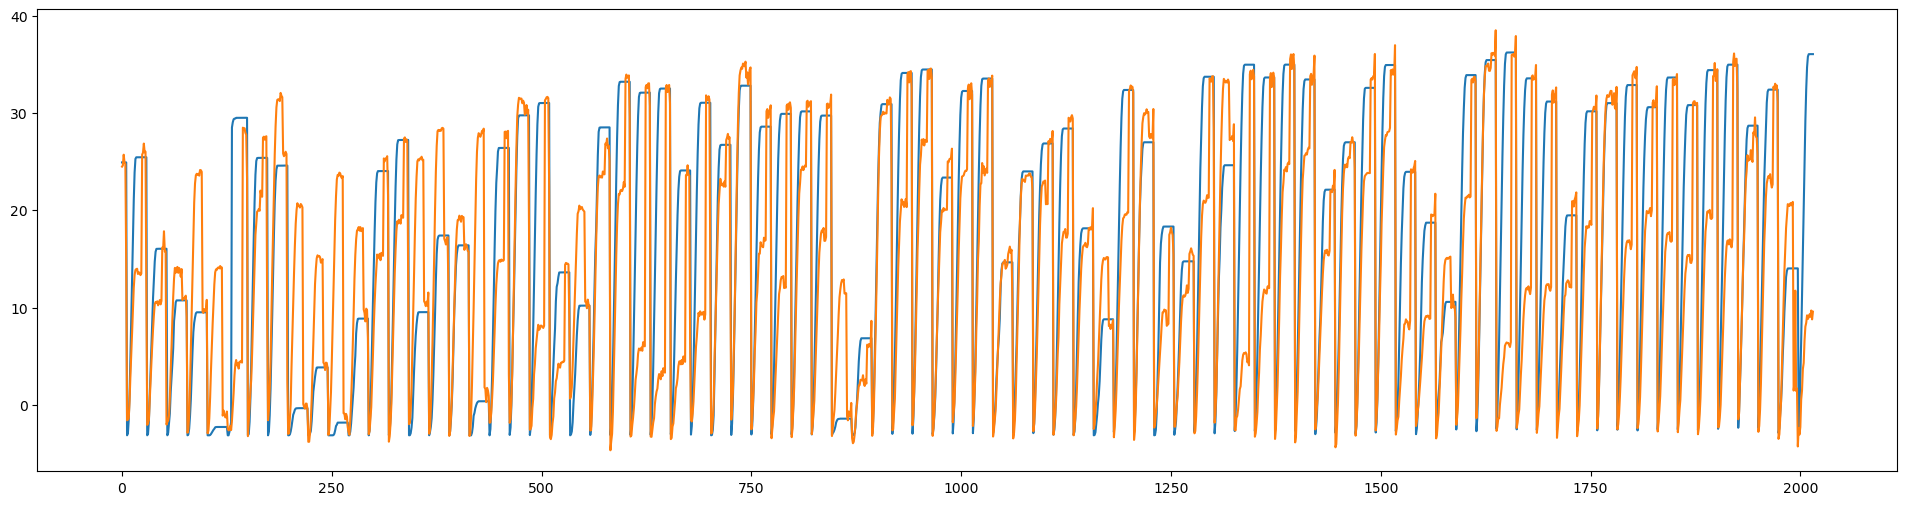

In [6]:
# show predicted value and target plot
import matplotlib.pyplot as plt
plt.figure(figsize=(24,6))
plt.plot(range(len(target)), target)
plt.plot(range(len(data)), data)

len(target), len(data)
